In [1]:
#2020-21 NBA PLAYER INDEX/COMPARISON TOOL, A PROGRAM BY FIDEL RIVERA

#INSTALLS

#!pip install nba_api #API for lots of useful nba data.
#!pip install wikipedia #API for lots of useful data about the individual. We use this to pull up a player description of the NBA Player inputted by the User
#!pip install lxml #"Python library which allows for easy handling of XML and HTML files, and can also be used for web scraping."

#IMPORTS

import requests #"allows you to send HTTP requests using Python. The HTTP request returns a Response Object with all the response data (content, encoding, status, etc)."
import bs4 #"Beautiful Soup is a Python library for pulling data out of HTML and XML files."
from bs4 import BeautifulSoup
import wikipedia #"Wikipedia is a Python library that makes it easy to access and parse data from Wikipedia. Search Wikipedia, get article summaries, get data like links and images from a page, and more. Wikipedia wraps the MediaWiki API so you can focus on using Wikipedia data, not getting it."
import pandas as pd #"pandas is a popular Python-based data analysis toolkit which can be imported using import pandas as pd . It presents a diverse range of utilities, ranging from parsing multiple file formats to converting an entire data table into a NumPy matrix array."
from urllib.request import urlopen #After doing a little bit of research i found this could be pretty useful for web scraping, it allows us to actually open URL's.

#FUNCTIONS
print("Enter the season below")
szn =  input() #int(input("Enter a Year: ")) #This is the season we will be analyzing. This is pretty cool because I can switch this to any year and it will give me the stats for that season.
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(szn) #This link is where we will be web scraping from. I decided to web scrape rather than use a CVS file, because NBA statistic are dynamic and alawys changing.
html = urlopen(url) # this is the HTML from the given URL
soup = BeautifulSoup(html) # this function is what scrapes through our URL, to turn it into something we can actually use.
soup.findAll('tr', limit=2) #the findall function is what allows us to get the column headers. We need these to better organize and understand the data.
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')] # the getText() function allows us to take the text we need from the URL and put it into a list
headers = headers[1:] # 1: gets rid of the first column. The "ranking order" is unnecessary and irelevant for us.
headers
rows = soup.findAll('tr')[1:] # we again are skipping past the "rankings" column and the firt row
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
df = pd.DataFrame(player_stats, columns = headers) #THIS IS WHAT ALLOWS US TO CREATE THE DATA FRAME
df['Player'] = df['Player'].str.replace("*","")

 #SHOWS US THE TOP 10 ROWS IN THE DATA FRAME
#ray_allen_frame = df[df['Player']== 'Ray Allen*']
#ray_allen_frame

#ray_allen_frame_total = ray_allen_frame[ray_allen_frame['Tm'] == 'TOT']
#ray_allen_frame_total

Enter the season below
2020


In [ ]:
df.head(10)

In [3]:



print("Enter the name of the player you want to check bibliography")
a = input()
result = wikipedia.search(a)
page = wikipedia.page(result[0])
content = page.content
print(content)
#print(wikipedia.summary("LaMarcus Aldridge"))

Enter the name of the player you want to check bibliography
Damian Lillard
Damian Lamonte Ollie Lillard Sr. (born July 15, 1990) is an American professional basketball player for the Portland Trail Blazers of the National Basketball Association (NBA). He played college basketball for the Weber State Wildcats and earned third-team All-American honors in 2012. After being selected by Portland with the sixth overall pick in the 2012 NBA draft, Lillard was unanimously voted the NBA Rookie of the Year. Nicknamed "Dame Time", he has received six NBA All-Star selections and is one of two players in Trail Blazers franchise history, along with Clyde Drexler, to become a six-time All-Star.


== High school career ==
Lillard began his high school career at Arroyo High School in San Lorenzo, California, and joined the varsity starting lineup as a 5 ft 5 in (1.65 m) freshman. He sought to transfer when his coach did not return to the team. For his sophomore year, Lillard transferred to St. Joseph N

In [4]:
print(a, "Statistics for the season of ", szn)
first_player = df[df['Player']==a]
print(first_player[['Player', 'PTS','AST','TRB']])

Damian Lillard Statistics for the season of  2020
             Player   PTS  AST  TRB
390  Damian Lillard  30.0  8.0  4.3


In [2]:

player_2 = input("Enter a second player: ")
print(f"Stats for the {szn} season:")
second_player = df[df['Player']== player_2]
print(second_player[['Player', 'PTS','AST','TRB']])


df_row = pd.concat([first_player, second_player])
df_row=df_row[['Player', 'PTS','AST','TRB']]
df_row


df_row['PTS'] = df['PTS'].astype(float)
df_row['AST'] = df['AST'].astype(float)
df_row['TRB'] = df['TRB'].astype(float)
df['PTS'] = df['PTS'].astype(float)
df['AST'] = df['AST'].astype(float)
df['TRB'] = df['TRB'].astype(float)
df.dtypes


#calculating  if they are comparing one player individually
index = df_row. index
number_of_rows = len(index) 

average=pd.DataFrame({"Player":"Average","PTS":df["PTS"].mean(),"AST":df['AST'].mean(),"TRB":df['TRB'].mean()}, index=[3])


df_row = pd.concat([df_row, average])
df_row

ax = df_row.plot.bar(x='Player', y='PTS', rot=0)

ax = df_row.plot.bar(x='Player', y='AST', rot=0)

ax = df_row.plot.bar(x='Player', y='TRB', rot=0)

Enter a second player: Lonzo Ball


NameError: name 'szn' is not defined

In [6]:
df_row = pd.concat([first_player, second_player])
df_row=df_row[['Player', 'PTS','AST','TRB']]
df_row


,Player,PTS,AST,TRB
390,Damian Lillard,30.0,8.0,4.3
26,Lonzo Ball,11.8,7.0,6.1


In [7]:
df_row['PTS'] = df['PTS'].astype(float)
df_row['AST'] = df['AST'].astype(float)
df_row['TRB'] = df['TRB'].astype(float)
df['PTS'] = df['PTS'].astype(float)
df['AST'] = df['AST'].astype(float)
df['TRB'] = df['TRB'].astype(float)
df.dtypes


#calculating  if they are comparing one player individually
index = df_row. index
number_of_rows = len(index) 

average=pd.DataFrame({"Player":"Average","PTS":df["PTS"].mean(),"AST":df['AST'].mean(),"TRB":df['TRB'].mean()}, index=[3])


df_row = pd.concat([df_row, average])
df_row



,Player,PTS,AST,TRB
390,Damian Lillard,30.00000,8.000000,4.300000
26,Lonzo Ball,11.80000,7.000000,6.100000
3,Average,8.46129,1.843932,3.563287


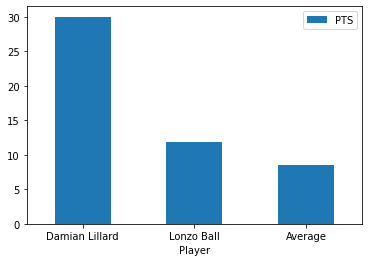

In [8]:
ax = df_row.plot.bar(x='Player', y='PTS', rot=0)

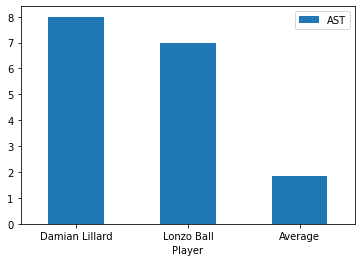

In [9]:
ax = df_row.plot.bar(x='Player', y='AST', rot=0)

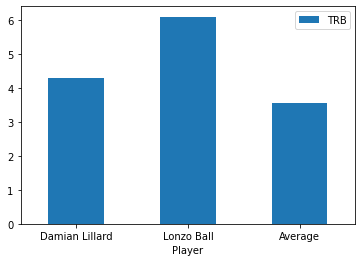

In [10]:
ax = df_row.plot.bar(x='Player', y='TRB', rot=0)